In [43]:
  
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt


In [18]:
device

device(type='cpu')

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


In [20]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [21]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [22]:
batch_size = 64
test_batch_size = 1000
train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}
if device=='cuda':
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

In [23]:

torch.manual_seed(42)

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)


In [24]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [25]:
dataiter_test = iter(test_loader)
images_test, labels_test = dataiter_test.next()

print(images_test.shape)
print(labels_test.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


(28, 28)


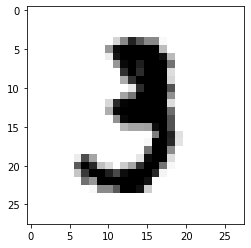

In [26]:
# plt.imshow(images[1,:,:,:])

print(images[1,:,:,:].numpy().squeeze().shape)
plt.imshow(images[10,:,:,:].numpy().squeeze(), cmap='gray_r')

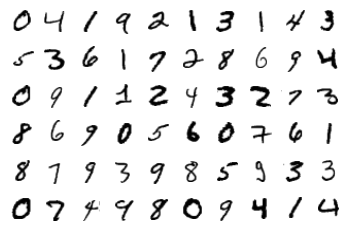

In [27]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [28]:
model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=1)

In [24]:
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, 10 + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296514
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.697333
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.664996
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.496545
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.356514
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.241250
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.334994
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.296184
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.340532
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.284319
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.164793
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.216020
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.290719
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.102182
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.243360
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.148172
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.358928
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.186239
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.453754
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.102826
Train Epoch: 1 [12800/60000 (

In [25]:
torch.save(model.state_dict(), "mnist_cnn.pt")

In [30]:
# Load model here
model = Net().to(device)
model.load_state_dict(torch.load('mnist_cnn.pt',map_location=torch.device('cpu')))
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [75]:
images_test[1].numpy().shape

(1, 28, 28)

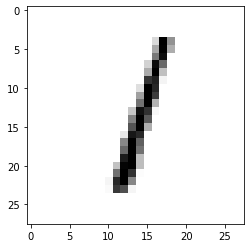

In [143]:
# plt.imshow(images_test[0,:,:,:])
import cv2
cv2.imwrite('img_cv.png', images_test[2].numpy().squeeze())
plt.imshow(images_test[2,:,:,:].numpy().squeeze(), cmap='gray_r')

In [1]:
pred = model(images[1:2,:,:,:])
ps = torch.exp(pred)
probab = list(ps.detach().numpy()[0])
probab
print("Predicted Digit =", probab.index(max(probab)))

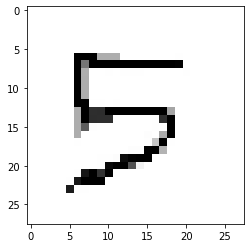

In [157]:
img_read = cv2.imread('img.jpg')
resized_image = cv2.resize(img_read, (28, 28)) 
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
plt.imshow(resized_image, cmap = 'gray_r')

In [158]:
# resized_image.shape
resized_image.reshape(1,1,28,28).shape

(1, 1, 28, 28)

In [159]:
img_to_pred=transform(resized_image).to(device)

In [160]:
pred = model(img_to_pred.reshape(1,1,28,28)).to(device)
ps = torch.exp(pred)
probab = list(ps.detach().numpy()[0])
probab
print("Predicted Digit =", probab.index(max(probab)))

Predicted Digit = 5
